# Prediciting High School Graduation Rate Based on Holistic Data of Previous Cohorts.

## Table of contents:
- [Project Overview](#Project-Overview)
- [Creating an environment from the environment.yml file](#Creating-an-environment-from-the-environment.yml-file)
- [Data Source](#Data-Source)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [First Simple Model](#First-Simple-Model)
- [Model Selection](#Model-Selection) 
- [Final Model Evaluation](#Final-Model-Evaluation)
- [Conclusion](#Conclusion)
- [Future Improvement Ideas](#Future-Improvement-Ideas)
- [Contact](#Contact)
- [Presentation Slide Deck](#[Presentation-Slide-Deck])

## Project Overview

Improving graduation rates is a constant concern for school district superintendents and administrators. From 2013 to 2019, Illinois’ 4-year high school graduation rates have fluctuated between 83% - 87% (as reported in the [Illinois Report Card Trend Data](https://www.isbe.net/pages/illinois-state-report-card-data.aspx).

The goal of this project is to create a machine learning model that can predict the 4-year graduation rate of a high school cohort based on data regarding the broader structure of the instructional setting and the experience of previous cohorts.

If it is possible to make such a prediction using readily available information it could be possible to provide an additional tool for superintendents to aide in managing their district schools. It could be usedto spot performance trends, identify cohorts in need of additional resources, or for school to project target goals for improved academic outcomes.

## Creating an environment from the environment.yml file
To run the code in these notebook, use the terminal or an Anaconda Prompt for the following steps:

Create the environment from the [environment.yml](https://github.com/dannmorr/predicting-ibse-graduation-rate/blob/master/environment.yml) file:
`conda env create -f environment.yml`

The first line of the yml file sets the new environment's name. 

Activate the new environment: 
`conda activate myenv`

Verify that the new environment was installed correctly:
`conda env list`


## Data Source
Data was gathered from the Illinois State Board of Education's [Illinois Report Card Data Library](https://www.isbe.net/pages/illinois-state-report-card-data.aspx) website. 
From the website: 
>The Report Card Data Library page is the repository for Report Card data available for public use. Here you can find Statewide Trend Data, Report Card Glossary of Terms, and the public data files from which the Report Card is produced annually.

The data for academic years 2018 and 2019 are each available to download in a single .xlsx Data File.

Gathering the data for each of the academic years 2013 - 2017 involves downloading semi-colon separate .txt Data Files and an accompanying Layout File.

Links for all of the downloads are available in the table below.

Cleaned .xlsx versions of the Data Files are contained in the [data folder](https://github.com/dannmorr/predicting-ibse-graduation-rate/tree/master/data) of this repo. 

Copies of the Layout Files are also available in the [references folder](https://github.com/dannmorr/predicting-ibse-graduation-rate/blob/master/references/Open_Illinois_Report_Card_Data_Files.pdf).

| Year | Link to Data File                                                                                      | Link to Layout File                                                               |
|------|--------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------|
| 2019 | https://www.isbe.net/_layouts/Download.aspx?SourceUrl=/Documents/2019-Report-Card-Public-Data-Set.xlsx | n/a                                                                               |
| 2018 | https://www.isbe.net/_layouts/Download.aspx?SourceUrl=/Documents/Report-Card-Public-Data-Set.xlsx      | n/a                                                                               |
| 2017 | https://www.isbe.net/Documents/rc17.zip                                                                | https://www.isbe.net/_layouts/Download.aspx?SourceUrl=/Documents/RC17_layout.xlsx |
| 2016 | https://www.isbe.net/_layouts/Download.aspx?SourceUrl=/Documents/rc16.zip                              | https://www.isbe.net/_layouts/Download.aspx?SourceUrl=/Documents/RC16-layout.xlsx |
| 2015 | https://www.isbe.net/_layouts/Download.aspx?SourceUrl=/Documents/rc15.zip                              | https://www.isbe.net/_layouts/Download.aspx?SourceUrl=/Documents/RC15-layout.xlsx |
| 2014 | https://www.isbe.net/_layouts/Download.aspx?SourceUrl=/Documents/rc14.zip                              | https://www.isbe.net/_layouts/Download.aspx?SourceUrl=/Documents/RC14_layout.xlsx |
| 2013 | https://www.isbe.net/_layouts/Download.aspx?SourceUrl=/Documents/2013-rc-separated.zip                 | https://www.isbe.net/_layouts/Download.aspx?SourceUrl=/Documents/RC13_layout.xlsx |

Instructions for Opening the Report Card Data Files is available in the [references folder](https://github.com/dannmorr/predicting-ibse-graduation-rate/blob/master/references/Open_Illinois_Report_Card_Data_Files.pdf) or can be downloaded [here](https://www.isbe.net/Documents/Open_Illinois_Report_Card_Data_Files.pdf).

>"The Illinois Report Card data files that are available for download from ISBE’s website do not include a header row. You must refer to the companion report card file layout Excel document to understandhow the data is organized within the worksheet."

While performing the tasks of downloading the files, and reviewing the contents and Layout Files, I also began to narrow down my selected feature set to use for this project. From the Data Files, I identified 35 features across these 6 categories that I felt would give an adequate holistic view on the students' experience:

**1. General School Information**
 - school_name
 - district
 - city
 - county
 - district_type
 - district_size
 - school_type
 - grades_served
 
**2. Student Demographics**
 - percent_student_enrollment_white
 - percent_student_enrollment_black_or_african_american
 - percent_student_enrollment_hispanic_or_latino
 - percent_student_enrollment_asian
 - percent_student_enrollment_native_hawaiian_or_other_pacific_islander
 - percent_student_enrollment_american_indian_or_alaska_native
 - percent_student_enrollment_two_or_more_races
 - number_student_enrollment
 - total_number_of_school_days
 - student_attendance_rate
 - student_chronic_truancy_rate
 - high_school_dropout_rate_total
 - high_school_4_year_graduation_rate_total
 - high_school_5_year_graduation_rate_total
 
**3. Instructional Setting**
 - avg_class_size_high_school
 
**4. Teacher and Administrator Statistics**
 - pupil_teacher_ratio_high_school
 - teacher_avg_salary
 - teacher_retention_rate
 - principal_turnover_within_6_years
 
**5. College and Career Readiness**
 - percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months
 - percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months
 - percent_9th_grade_on_track
 
**6. Advanced Coursework**
 - number_students_who_took_ap_classes_grade_10_total
 - number_students_who_took_ap_classes_grade_11_total
 - number_students_who_took_ap_classes_grade_12_total

### Inspecting the Data


Each row in the data sets represents one school in a given academic year. These data sets include all public and charter schools in Illinois serving grades PreK - 12.

The number of columns varied greatly from set to set (from 800 on the low end to 9,000 on the high end), as did the parameters that were recorded from one year to the next. The features listed above were consistenly available throughout these data files.

I will use the following cohorts for training the data:

- 2017
- 2016
- 2015
- 2014
- 2013

My validation set will be: 
- 2018

My test set will be 
- 2019

The target variable is **4-year high school graduation rate**.

### Imports
The import cell contains the libraries needed to run the code in this repo, and also includes plot parameters for charts, and functions contained in a .py file in the src folder. 

In [29]:
# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns 

# statsmodels imports
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# sklearn imports
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, SCORERS
from sklearn.model_selection import RandomizedSearchCV

# turn off warnings
import warnings
warnings.simplefilter('ignore', category = DeprecationWarning)
warnings.simplefilter('ignore', category = FutureWarning)

# plot parameters
plt.rcParams['figure.figsize'] = 20, 16
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 16

# functions from .py file
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
import src.eda_functions as fun

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data Cleaning

This is a brief overview of the steps taken to clean the data and combine the files into one working DataFrame.
The details can be seen in [notebooks/exploratory/01_cleaning_and_compiling](https://github.com/dannmorr/predicting-ibse-graduation-rate/blob/master/notebooks/exploratory/01_cleaning_and_compiling.ipynb)

1. Read in each cohort data file and create a dataframe for schools that serve grades 9 - 12.

    I chose this parameter because there are some charter schools, and schools in smaller districts that serve more grades than 9-12 (and a couple that serve 10-12 or just 11-12. 

    If they serve through grade 12, they submit graduation rate information. If they do not serve grade 12, they do not contain my target variable.
    
2. Convert numeric columns from 'object' to 'float'. Many of the columns had numeric values that were recorded as strings. These were converted to numbers. In some cases this revealed missing values that were replaced with zeros (see next step), others were later imputed with mean values - after performing a train test split. 

3. Fill in NaNs with zeros as appropriate:
    For example, looking at percentages of student demographics, all groups may not be represented and, therefore, cells left blank instead of recording a zero.
    Similarly, not all schools offer Advanced Placement classes for grades 10, 11 and 12. Where these are blank, they have been recorded as zeros.

The individual DataFrames were concatonated and saved as `merged_df`

## Exploratory Data Analysis 

In [2]:
# merged_df contains all cohorts 2013 - 2019
merged_df = pd.read_csv('../../data/merged_df.csv')
fun.to_obj(merged_df, 'cohort')

This function runs a nice overview of the DateFrame to look for missing values, dtypes, mean, median, etc.

In [3]:
fun.proj_eda(merged_df)

,null_sum,null_pct,dtypes,count,mean,median,min,max
avg_class_size_high_school,73,0.015070,float64,4771,17.819157,18.00,0.3,81
city,0,0.000000,object,4844,NaN,NaN,Abingdon,Zion
cohort,0,0.000000,object,4844,2016.055326,2016.00,2013,2019
county,0,0.000000,object,4844,NaN,NaN,Adams,Woodford
district,0,0.000000,object,4844,NaN,NaN,A-C Central CUSD 262,Zion-Benton Twp HSD 126
district_size,0,0.000000,object,4844,NaN,NaN,LARGE,SMALL
district_type,0,0.000000,object,4844,NaN,NaN,HIGH SCHOOL,UNIT
grades_served,0,0.000000,object,4844,NaN,NaN,10 11 12,PK K 1 2 3 4 5 6 7 8 9 10 11 12
high_school_4_year_graduation_rate_total,29,0.005987,float64,4815,85.428744,88.90,0,100
high_school_5_year_graduation_rate_total,91,0.018786,float64,4753,87.559142,90.50,0,100


### Removing Columns

In [4]:
merged_df.isnull().sum().sort_values(ascending=False)

teacher_avg_salary                                                            4844
pupil_teacher_ratio_high_school                                               2123
number_students_who_took_ap_classes_grade_12_total                            2021
number_students_who_took_ap_classes_grade_11_total                            2021
number_students_who_took_ap_classes_grade_10_total                            2021
percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months    1561
percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months    1561
percent_9th_grade_on_track                                                    1487
teacher_retention_rate                                                         811
principal_turnover_within_6_years                                              781
high_school_5_year_graduation_rate_total                                        91
avg_class_size_high_school                                                      73
high

##### Starting from the largest values:
- **Avg teacher salary will be dropped.** 

The data is reported at the disctrict level, not by every school. Also I've reconsidered the usefulness of that item.
- **Pupil-Teacher ratio will be dropped.** 

It was reported by school for 2013-2017, but only at a district level for 2018 and 2019. I don't want to mix the two at this time
- **AP classes will be dropped.**

I feel like this is important. It wasn't entered for 2013 or 2014, which is a lot of missing values. Many schools don't offer AP classes, so it may also act as a penalty to them. Since they are more than 50% NaNs (or zeros), I should drop them. 
- **Percent of Graduates columns. Further investigating at the ISBE Data Library showed that these NaNs should be recorded as zeros.**

- **Percent of 9th graders. Further investigating at the ISBE Data Library showed that these NaNs should have been recorded as zeros.**

- **Teacher retention rate. I will replace with mean of the column when imputing.**

- **Principal turnover will be dropped.** 

Like teacher salary, I'm not sure how important it really is.
- **5 year graduation rate. I will replace with mean of the column when imputing.**

- **Avg class size. I will replace with mean of the column when imputing.**

- **Dropout rate. I will replace with mean of the column when imputing.**


- **4 year graduation rate.** 

Since it was a small number missing in each year, I returned to the datasets, and ISBE website to research each school and can confirm that these observations should be dropped. These missing values included new charter schools that began classes in 2013 or 2014 so did not have any graduations for the first three years they were open.

### Final list of features
After dropping the necessary columns, the final list of features will be:

**1. General School Information**
 - school_name
 - district
 - city
 - county
 - district_type
 - district_size
 - school_type
 - grades_served
 
**2. Student Demographics**
 - percent_student_enrollment_white
 - percent_student_enrollment_black_or_african_american
 - percent_student_enrollment_hispanic_or_latino
 - percent_student_enrollment_asian
 - percent_student_enrollment_native_hawaiian_or_other_pacific_islander
 - percent_student_enrollment_american_indian_or_alaska_native
 - percent_student_enrollment_two_or_more_races
 - number_student_enrollment
 - total_number_of_school_days
 - student_attendance_rate
 - student_chronic_truancy_rate
 - high_school_dropout_rate_total
 - high_school_4_year_graduation_rate_total
 - high_school_5_year_graduation_rate_total
 
**3. Instructional Setting**
 - avg_class_size_high_school
 
**4. Teacher and Administrator Statistics**
 - teacher_retention_rate
 
**5. College and Career Readiness**
 - percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months
 - percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months
 - percent_9th_grade_on_track
 
**6. Advanced Coursework**
*none*

I performed my Train/Validation/Test split on the merged DataFrame.

In [5]:
# train_set contains cohorts 2013 - 2017
train_set = pd.read_csv('../../data/train_set.csv')
fun.to_obj(train_set, 'cohort')

In [6]:
# val_set contains cohort 2018
val_set = pd.read_csv('../../data/val_set.csv')
fun.to_obj(val_set, 'cohort')

In [7]:
# test_set contrains cohort 2019
test_set = pd.read_csv('../../data/test_set.csv')
fun.to_obj(test_set, 'cohort')

I then took a look at the numeric features of the Train Set to check the correlations 

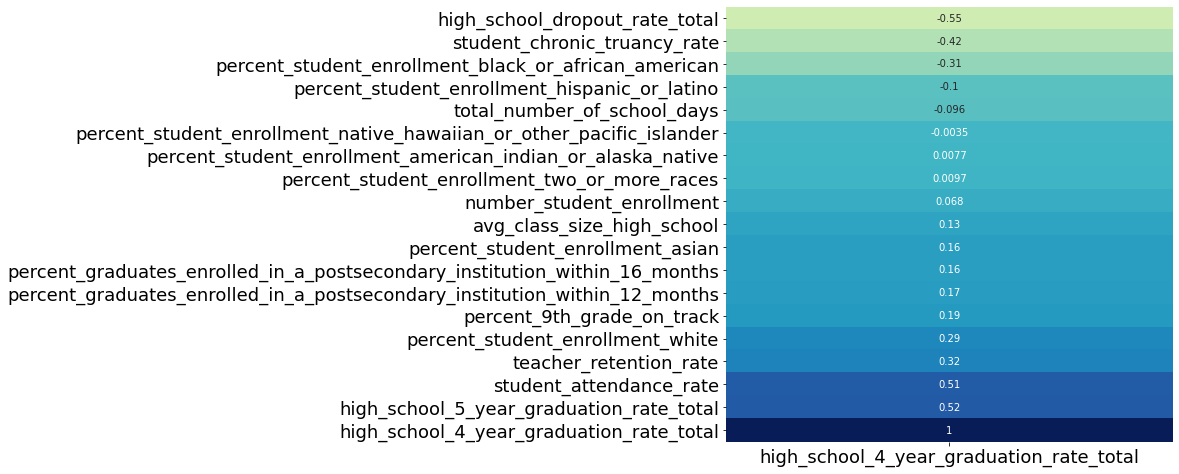

In [8]:
num_features = train_set.select_dtypes(['float64', 'int64'])
fun.heatmap(num_features, 'high_school_4_year_graduation_rate_total')
plt.savefig('../../reports/figures/correlations_map.png')
plt.show();

This heatmap shows correlations to the target variable.

I want to take a closer look at the most significant features by correlation (both positive and negative)

![top10_by_correlation.png](../../reports/figures/top10_by_correlation.png)

Not surprisingly, features such as 5-year graduation rate, student attendance rate, and teacher retention rate have a strong positive correlation to 4-year graduation. While high school dropout rate has a strong negative correlation.

The correlation between demographic groups and graduation rates is not a comment on race but is an indication of segregation of populations and acceses to resources and funding for schools.

**A note about 4-year vs 5-year graduation**: A student who completes all graduation requirements in the traditional 4-year schedule is included in the 4-year graduation rate total. If a student takes an extra year to complete all graduation requirements they are included in the 5-year graduation rate total. They may graduate in the same year, but are counted separately in the data. 

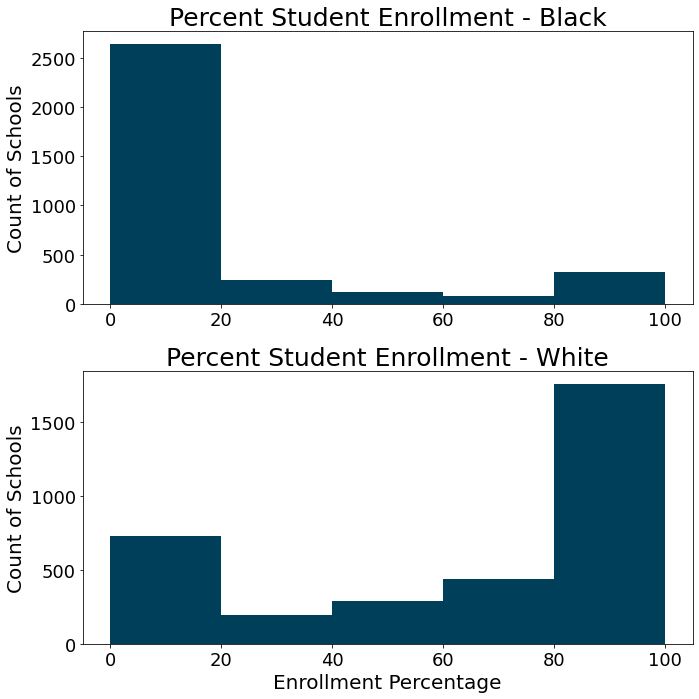

In [35]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))

axes[0].hist(train_set.percent_student_enrollment_black_or_african_american, bins = 5, color='#003f5a')
axes[0].set_title('Percent Student Enrollment - Black')
axes[0].set_xlabel('')
axes[0].set_ylabel('Count of Schools')

axes[1].hist(train_set.percent_student_enrollment_white, bins = 5, color='#003f5a')
axes[1].set_title('Percent Student Enrollment - White')
axes[1].set_xlabel('Enrollment Percentage')
axes[1].set_ylabel('Count of Schools')

plt.tight_layout()
plt.savefig('../../reports/figures/enrollment_hist.png')
plt.show();

These histograms show that for well over half of the schools Black or African American students make up less than 20% of the population. Also, approximately half of the schools have a student population that is at least 80% White.

That accounts for the correlation values above. There are more schools with both lower numbers of Black or African American students, and higher numbers of White students.

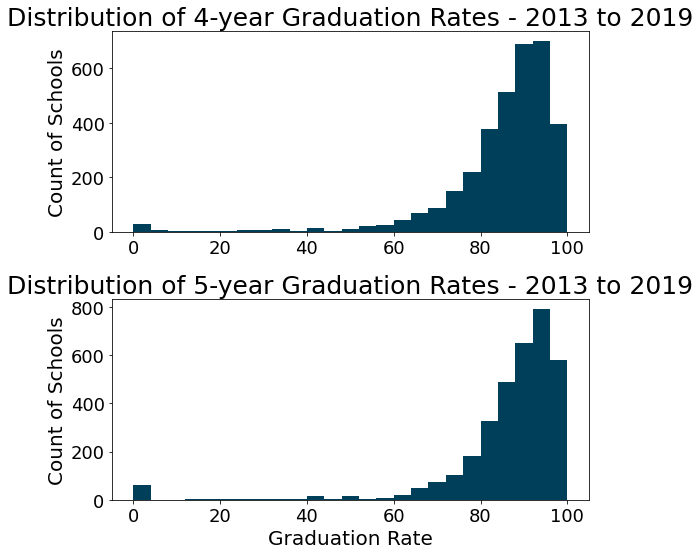

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(8,8))

axes[0].hist(train_set.high_school_4_year_graduation_rate_total, bins = 25, color='#003f5a')
axes[0].set_title('Distribution of 4-year Graduation Rates - 2013 to 2019')
axes[0].set_xlabel('')
axes[0].set_ylabel('Count of Schools')

axes[1].hist(train_set.high_school_5_year_graduation_rate_total, bins = 25, color='#003f5a')
axes[1].set_title('Distribution of 5-year Graduation Rates - 2013 to 2019')
axes[1].set_xlabel('Graduation Rate')
axes[1].set_ylabel('Count of Schools')

plt.tight_layout()
plt.savefig('../../reports/figures/grad_rate_hist.png')
plt.show();

Looking at the histograms for these two columns, it is obvious why they are highly correlated. There is an almost identical left skewed distribution for each.

It is not that surprising that the rates of graduation for the two populations would be similar at any given school, though.

## First Simple Model

I used a basic OLS Linear Regression to set a base line using [this forward selected function](#https://planspace.org/20150423-forward_selection_with_statsmodels/) to select the numeric features.
   
  >"It tries to optimize adjusted R-squared by adding features that help the most one at a time until the score goes down or you run out of features."

In [10]:
fsm = fun.forward_selected(num_features, 'high_school_4_year_graduation_rate_total')
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     high_school_4_year_graduation_rate_total   R-squared:                       0.445
Model:                                                  OLS   Adj. R-squared:                  0.441
Method:                                       Least Squares   F-statistic:                     124.8
Date:                                      Wed, 19 Aug 2020   Prob (F-statistic):          1.63e-322
Time:                                              11:47:53   Log-Likelihood:                -9984.4
No. Observations:                                      2669   AIC:                         2.000e+04
Df Residuals:                                          2651   BIC:                         2.011e+04
Df Model:                                                17                                         
Covariance Type:                                  nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                   -144.7012    276.771     -0.523      0.601    -687.410     398.008
high_school_dropout_rate_total                                                -0.8592      0.059    -14.483      0.000      -0.976      -0.743
high_school_5_year_graduation_rate_total                                       0.3664      0.019     19.778      0.000       0.330       0.403
teacher_retention_rate                                                         0.0834      0.018      4.662      0.000       0.048       0.118
student_attendance_rate                                                        0.2723      0.082      3.312      0.001       0.111       0.434
percent_student_enrollment_asian                                               1.6085      2.759      0.583      0.560      -3.801       7.018
percent_9th_grade_on_track                                                     0.0408      0.011      3.775      0.000       0.020       0.062
percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months    -0.1795      0.076     -2.353      0.019      -0.329      -0.030
percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months     0.1414      0.078      1.802      0.072      -0.012       0.295
percent_student_enrollment_two_or_more_races                                   1.3489      2.760      0.489      0.625      -4.063       6.760
student_chronic_truancy_rate                                                  -0.0192      0.018     -1.088      0.277      -0.054       0.015
total_number_of_school_days                                                    0.1334      0.097      1.374      0.170      -0.057       0.324
number_student_enrollment                                                     -0.0003      0.000     -1.154      0.249      -0.001       0.000
percent_student_enrollment_native_hawaiian_or_other_pacific_islander           0.6060      2.901      0.209      0.835      -5.082       6.294
percent_student_enrollment_american_indian_or_alaska_native                    1.7843      2.825      0.632      0.528      -3.755       7.324
percent_student_enrollment_black_or_african_american                           1.4455      2.758      0.524      0.600      -3.963       6.855
percent_student_enrollment_hispanic_or_latino                                  1.4505      2.759      0.526      0.599      

This model returned an adjusted R-squared value of 0.441, indicating that less than 50% of the the variance in the target variable is predictable from the features. This was the baseline model, did not include any of the categorical features, and there was no feature engineering or hyperparameter tuning. That leaves me feeling optimistic that I can improve on this with all of the above.

The p-values for several of the "Top 10 Features by Correlation" is at or close to 0.00, indicating these features are meaningful to the model. This includes:
**High School Dropout Rate
5-year Graduation Rate
Teacher Retention Rate
Percent of 9th Graders on Track
Student Attendance Rate

The values for **Percent of Graduates Enrolled in PostSecondary Education (both 16-month and 12-month)** are also very low, 0.019 and 0.072 respectively. These features also are meaningful... although less so than those above.

The values for demographic features **Percent Student Enrollment by...** have significantly higher p-value scores ranging from 0.560 to 0.835, indicating that these features are not actually statisically significant.



## Feature engineering and selection

The next steps are to separate the target from the features in my three sets

In [11]:
X_train = train_set.drop('high_school_4_year_graduation_rate_total', axis=1)
y_train = train_set.high_school_4_year_graduation_rate_total

X_val = val_set.drop('high_school_4_year_graduation_rate_total', axis=1)
y_val = val_set.high_school_4_year_graduation_rate_total

X_test = test_set.drop('high_school_4_year_graduation_rate_total', axis=1)
y_test = test_set.high_school_4_year_graduation_rate_total

##### Impute and Scale the numeric features

In [12]:
# identify numeric features
train_num = X_train.select_dtypes(['float64', 'int64'])
val_num = X_val.select_dtypes(['float64', 'int64'])
test_num = X_test.select_dtypes(['float64', 'int64'])
# instatiate imputer
imputer = SimpleImputer(strategy='median')

# fit on the training features
imputer.fit(train_num)

# transform training, validation, and testing data
train_imp= imputer.transform(train_num)
val_imp = imputer.transform(val_num)
test_imp = imputer.transform(test_num)

# return to DataFrames
X_train_imp = pd.DataFrame(train_imp, columns=train_num.columns, index=X_train.index)
X_val_imp = pd.DataFrame(val_imp, columns=val_num.columns, index=X_val.index)
X_test_imp = pd.DataFrame(test_imp, columns=test_num.columns, index=X_test.index)

# identify features
X_train_num = X_train_imp.select_dtypes(['float64', 'int64'])
X_val_num = X_val_imp.select_dtypes(['float64', 'int64'])
X_test_num = X_test_imp.select_dtypes(['float64', 'int64'])

# instatiate scaler
ss = StandardScaler()

# train on the training features
ss.fit(X_train_num)

# transform training, validation, and testing data
X_train_sc= ss.transform(X_train_num)
X_val_sc = ss.transform(X_val_num)
X_test_sc = ss.transform(X_test_num)

# return to DataFrame
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train_num.columns, index=X_train.index)
X_val_sc = pd.DataFrame(X_val_sc, columns=X_val_num.columns, index=X_val.index)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test_num.columns, index=X_test.index)


##### Select and One Hot Encode categorical features.
I selected district_type, district_size, and school_type.
Features such as city, disctrict, county, etc had so many values that it would have created an unmanageable number of encoded features without adding much return. 

In [13]:
# identify features
X_train_obj = X_train.select_dtypes(['object']).astype('category')
X_val_obj = X_val.select_dtypes(['object']).astype('category')
X_test_obj = X_test.select_dtypes(['object']).astype('category')

There was one last bit of data cleaning to perform, as I discovered some cells had white space of various lengths that needed to be stripped.

In [14]:
# strip white space from strings
X_train_cat = X_train_obj.loc[:, ('district_type', 'district_size', 'school_type')]
X_train_cat.district_type = X_train_obj.district_type.str.rstrip()
X_train_cat.district_size = X_train_obj.district_size.str.rstrip()
X_train_cat.school_type = X_train_cat.school_type.str.rstrip()

X_val_cat = X_val_obj.loc[:, ('district_type', 'district_size', 'school_type')]
X_val_cat.district_type = X_train_obj.district_type.str.rstrip()
X_val_cat.district_size = X_train_obj.district_size.str.rstrip()
X_val_cat.school_type = X_train_cat.school_type.str.rstrip()

X_test_cat = X_test_obj.loc[:, ('district_type', 'district_size', 'school_type')]
X_test_cat.district_type = X_train_obj.district_type.str.rstrip()
X_test_cat.district_size = X_train_obj.district_size.str.rstrip()
X_test_cat.school_type = X_train_cat.school_type.str.rstrip()

#encode the categoricals
ohe = OneHotEncoder(drop='first')

# fit on training data
ohe.fit(X_train_cat)

# transform training, validation, and testing data
X_train_ohe = ohe.transform(X_train_cat).toarray()
X_val_ohe = ohe.transform(X_val_cat).toarray()
X_test_ohe = ohe.transform(X_test_cat).toarray()

# return to DataFrames
X_train_processed = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train_cat.columns))
X_val_processed = pd.DataFrame(X_val_ohe, columns=ohe.get_feature_names(X_val_cat.columns))
X_test_processed = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(X_test_cat.columns))

In [15]:
# concatenate the numerical and categorical features back together
X_train_all = pd.concat([X_train_sc, X_train_processed], axis=1)
X_val_all = pd.concat([X_val_sc, X_val_processed], axis=1)
X_test_all = pd.concat([X_test_sc, X_test_processed], axis=1)

## Model selection
For model selection, I decided to compare several models on their default settings and the same random state (19).

The models I chose are 
- Linear Regression
- Random Forest Regressor
- Extra Trees Regressor
- Lasso
- Ridge
- Gradient Boosting Regressor
- Support Vector Regressor
- K-Nearest Neighbor Regressor

The results are plotted below.

![model_compare.png](../../reports/figures/model_compare.png)

#### Gradient Boosting returned the highest Adjusted R-squared value of 0.554.

I then employed RandomizedSearchCV to determine the optimal settings for the hyperparameters.

In [16]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

# Create the model to use for hyperparameter tuning
model_1 = GradientBoostingRegressor(random_state = 19)

# Set up the random search with 4-fold cross validation
random_cv_1 = RandomizedSearchCV(estimator=model_1,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'r2',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=19)

In [17]:
# Fit on the training data
random_cv_1.fit(X_train_all, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.9min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [18]:
# Find the best combination of settings
random_cv_1.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=19, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

I then fit and evaluated the "best" model on the validation set:

In [19]:
model_1 = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=19, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


# train the model
model_1.fit(X_train_all, y_train)
    
# make predictions and evalute
model_1_pred = model_1.predict(X_val_all)
model_1_r2 = r2_score(y_val, model_1_pred)
model_1_adj_r2 = round(1-(1-model_1_r2)*((3403-1)/(3403-23-1)), 3)

# Return the performance metric
print('Adjusted R-squared on Test Set: = %0.3f' % model_1_adj_r2)

Adjusted R-squared on Test Set: = 0.586


#### The model returned an R-squared value of 0.586.
This was an improvement over the model's score of 0.554 in its' default state.
While some further manual tuning of hyperparameters may offer some additional improvement to the score, I don't believe my adjustments would amount to anything more than guessing and the time I spent would probably not be a good ROI.

In [43]:
# Select the best model
final_model = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=19, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# Train the model
final_model.fit(X_train_all, y_train)
    
# Make predictions and evalute
final_model_pred = final_model.predict(X_test_all)
final_model_r2 = (r2_score(y_test, final_model_pred))
adj_r2 = round((1-(1-final_model_r2))*((3403-1)/(3403-23-1)), 3)

# Return the performance metric
print('Adjusted R-squared on Test Set: = %0.3f' % adj_r2)

Adjusted R-squared on Test Set: = 0.688


## Final Model Evaluation
#### The final model returned an R-squared value of 0.688.
That is a surprisingly good result on the test data. The R-squared values have been steadily increasing throughout is process, as seen in the chart below:

| Model                                         | Evaluated on   | Adjusted R-Squared Score |
|-----------------------------------------------|----------------|-----------------|
| Ordinary Least Squares  Linear Regression     | Validation set | 0.441           |
| Gradient Boosting Regressor (default setting)   | Validation set | 0.554           |
| Gradient Boosting Regressor (optimized setting) | Validation set | 0.586           |
| Gradient Boosting Regressor (optimized setting) | Test set       | 0.688           |

From the First Simple Model to the Final Model there was an increase of approximately 25 percentage points.
This indicates that the model is improving at each iteration.
Although the R-squared values are increasing, there are no giant leaps that suggest overfitting.

### Feature Importances

In [21]:
feature_results = pd.DataFrame({'feature': list(X_train_all.columns), 
                                'importance': final_model.feature_importances_})

# Show the top 5 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

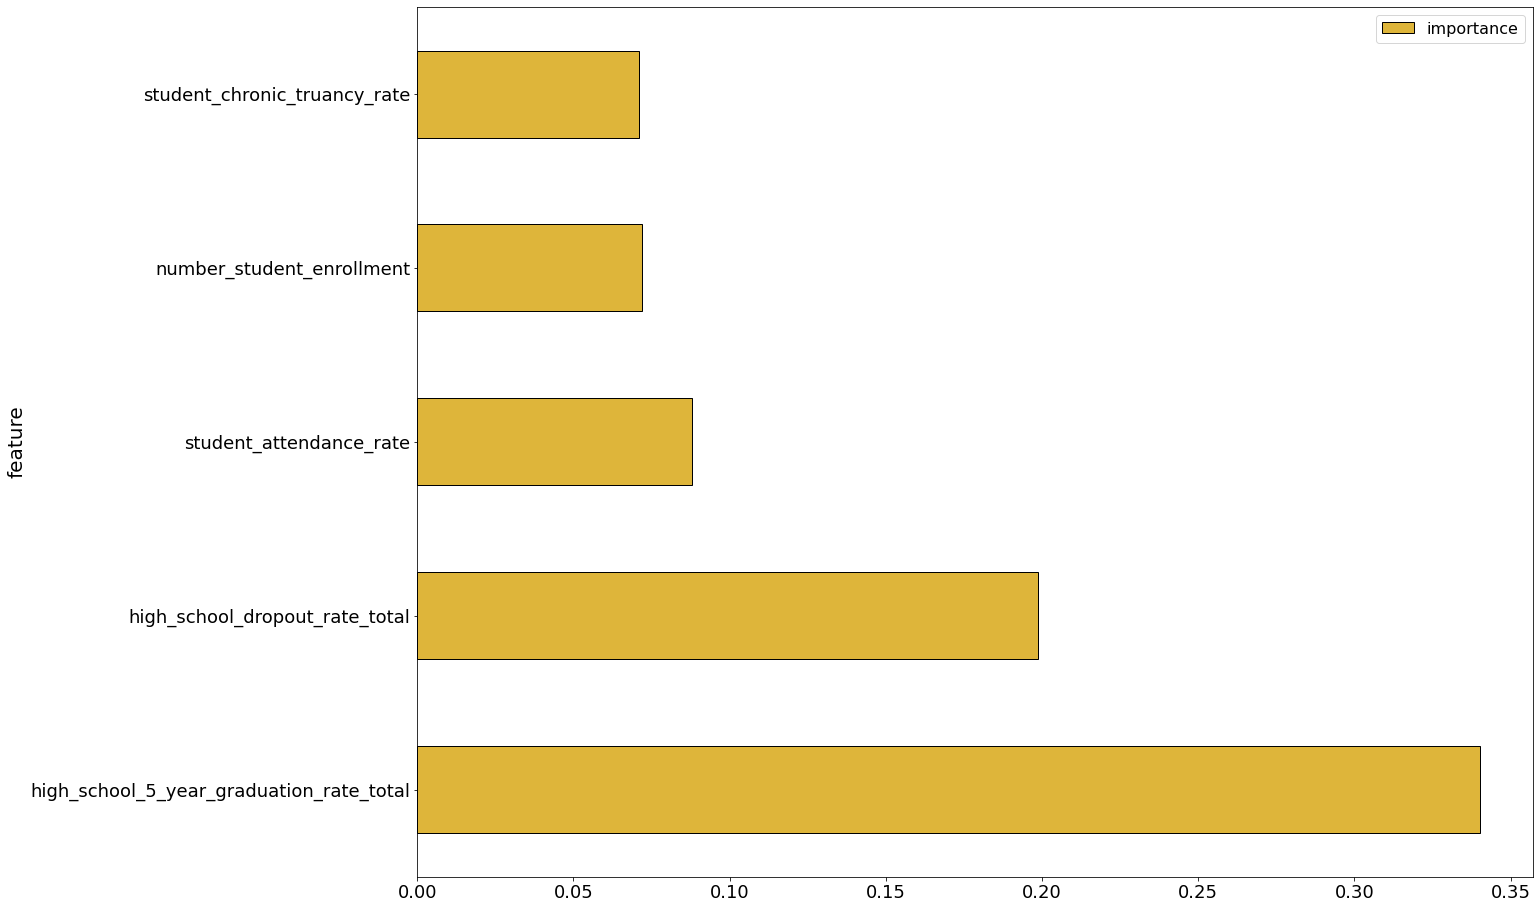

In [30]:
# Plot the  most important features in a horizontal bar chart
feature_results.loc[:4, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = '#deb53a');
#plt.xlabel('Relative Importance'); plt.ylabel('Feature')
#plt.title('Feature Importances from Final Model')
plt.savefig('../../reports/figures/feature_importance.png')
plt.show();

Upon reviewing the feature importances of the final model, I notice that it is  similar to the "Top 10 Features by Correlation" from above.
The features "5-year Graduation Rate", "High School Dropout Rate", and "Student Attendance Rate" are the top 3 in both plots.
"5-year Graduation Rate" and "Student Attendance Rate" surely have a positive correlation here, and "High School Dropout Rate" a negative correlation to predicting the 4-year graduation rate.

In the case of the other two features in this chart - "Number of Student Enrollment" and "Chronic Student Truancy Rate". They are probably significant in postive and negative ways, respectively.

The greater the number of students in a school would increase the probability of students graduating overall. Conversely, the higher the truancy rate at a school, the loweer the graduation rate will be. 

## Conclusion

At this point, I feel this result is a "proof of concept" for the project. The Adjusted R-squared value of 0.688 on the final model does not satisfy me that it could be used for predictions in the real world at this time. However, there is still the possibility of building upon this start and attempting to improve its' ability.

## Future Improvement Ideas

Some ideas I would like to pursue include:
- optimizing some of the other models I tried during selection.
Gradient Boosting returned the highest value in the default state, but Ridge, KNN, Lasso, and Extra Trees were all close behind.

- additional feature engineering and feature selection
I would like to reassess some of the features that I eliminated in EDA.
Perhaps it would be possible to find more about the missing values, include some of the data recorded at the district level, and possibly look at including financial, tax, or census information.

- new code for data cleaning
As a side note to the model building: If I join more data sources, I would like to work on some code to gather and compile data more elegantly and efficiently.

## Contact

#### Dann Morr [GitHub](https://github.com/dannmorr) | [LinkedIn](https://linkedin.com/in/dannmorr) | [Medium](https://medium.com/@dannmorr) | [Email](mailto:dannmorr@gmail.com)

## Presentation Slide Deck
[View here](https://github.com/dannmorr/predicting-ibse-graduation-rate/blob/master/reports/presentation.pdf)